In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [6]:
#อ่านข้อมูลจาก API all cases
url= "https://covid19.th-stat.com/api/open/cases"
cr = requests.get(url)

date = cr.json()
date = date["UpdateDate"]
print("Update Date=",date)

case = cr.json()
case = case["Data"]
case_df = pd.DataFrame(case)
case_df.tail()

Update Date= 28/04/2020


,ConfirmDate,No,Age,Gender,GenderEn,Nation,NationEn,Province,ProvinceId,District,ProvinceEn,Detail
2933,2020-01-24 00:00:00,5,66.0,หญิง,Female,จีน,Chinese,นนทบุรี,24,,Nonthaburi,None
2934,2020-01-22 00:00:00,4,68.0,ชาย,Male,จีน,Chinese,กรุงเทพมหานคร,1,,Bangkok,None
2935,2020-01-22 00:00:00,3,73.0,หญิง,Female,ไทย,Thai,นครปฐม,19,เมือง,Nakhon Pathom,None
2936,2020-01-17 00:00:00,2,74.0,หญิง,Female,จีน,Chinese,กรุงเทพมหานคร,1,,Bangkok,None
2937,2020-01-12 00:00:00,1,61.0,หญิง,Female,จีน,Chinese,กรุงเทพมหานคร,1,,Bangkok,None


In [7]:
#นำ column ที่ไม่ได้ใช้ออก
case_df = case_df.drop(["ConfirmDate","No","Gender","Nation","Province","ProvinceId","District","Detail"],axis=1)
print("Update Date=",date)
case_df.head()

Update Date= 28/04/2020


,Age,GenderEn,NationEn,ProvinceEn
0,25.0,Female,Chinese,Bangkok
1,39.0,Female,Thai,Bangkok
2,50.0,Female,Thai,Phuket
3,20.0,Male,Thai,Phuket
4,23.0,Male,Thai,Phuket


In [8]:
#ลบ row ที่มี missing value
case_df = case_df.dropna(axis=0)
print("Update Date=",date)
case_df.head()

Update Date= 28/04/2020


,Age,GenderEn,NationEn,ProvinceEn
0,25.0,Female,Chinese,Bangkok
1,39.0,Female,Thai,Bangkok
2,50.0,Female,Thai,Phuket
3,20.0,Male,Thai,Phuket
4,23.0,Male,Thai,Phuket


In [10]:
#เลือกข้อมูลสัญชาติมาแสดงผล
print("Update Date=",date)
set_nation=set(case_df["NationEn"])
nationlist=list(case_df["NationEn"])
count_set_nation=len(set_nation)
print("Number of nations : ", count_set_nation)

nations={}
for nation in nationlist:
    if nation in nations:
        nations[nation]+=1
    else:
        nations[nation]=1
print(nations)

Update Date= 28/04/2020
Number of nations :  48
{'Chinese': 34, 'Thai': 2626, 'Burmese': 53, 'Vietnamese': 4, 'Malaysian': 4, 'Indian': 9, 'Cambodian': 3, 'English': 4, 'Filipino': 5, 'Italian': 8, 'French': 29, 'American': 12, 'British': 20, 'Unknown': 14, 'Laotian': 2, 'Australian': 4, 'Russian': 12, 'Palestinian': 1, 'Singaporean': 5, 'Kazakhstani': 2, 'Israelis': 2, 'Brazilian': 2, 'Japanese': 11, 'Albanian': 2, 'Dutch': 1, 'Swedish': 5, 'Mexican': 1, 'Tunisian': 1, 'Belgian': 6, 'Liberian': 1, 'German': 8, 'Hungarian': 1, 'Swiss': 6, 'Pakistani': 4, 'Canadian': 8, 'Serbian': 1, 'Korean': 3, 'Taiwanese': 1, 'Indonesian': 3, 'Indian-Thai': 1, 'Spain': 2, 'Uzbeks': 1, 'Portuguese': 1, 'Ukrainian': 1, 'Danish': 5, 'Finnish': 1, 'New Zealand': 1, 'Iranian': 1}


In [11]:
#เลือกข้อมูลเพศมาแสดงผล
print("Update Date=",date)
set_gender=set(case_df["GenderEn"])
genderlist=list(case_df["GenderEn"])
count_set_gender=len(set_gender)
print("Number of gender : ", count_set_gender)

genders={}
for gender in genderlist:
    if gender in genders:
        genders[gender]+=1
    else:
        genders[gender]=1
print(genders)

Update Date= 28/04/2020
Number of gender :  2
{'Female': 1324, 'Male': 1608}


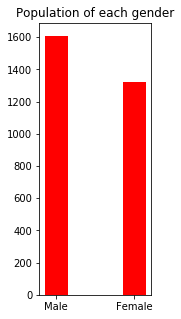

Update Date= 28/04/2020


In [12]:
#แสดง bar chart เพศ
plt.figure(figsize=[2,5])
x = np.arange(1,3) 
y = [genders['Male'],genders['Female']]  
gender = ['Male','Female']

ax = plt.gca(xticks=x)
ax.set_xticklabels(gender)
bara = plt.bar(x,y,align='center',width=0.3,color='red')
plt.title('Population of each gender')
plt.show()

print("Update Date=",date)

In [13]:
#อ่านข้อมูลจาก API update cases
url="https://covid19.th-stat.com/api/open/timeline"
ur = requests.get(url)

update = ur.json()
date = update["UpdateDate"]
print("Update Date=",date)

update = ur.json()
update = update["Data"]
update_df = pd.DataFrame(update)
update_df.tail()

Update Date= 29/04/2020 11:34


,Date,NewConfirmed,NewRecovered,NewHospitalized,NewDeaths,Confirmed,Recovered,Hospitalized,Deaths
115,04/25/2020,53,57,-5,1,2907,2547,309,51
116,04/26/2020,15,47,-32,0,2922,2594,277,51
117,04/27/2020,9,15,-7,1,2931,2609,270,52
118,04/28/2020,7,43,-38,2,2938,2652,232,54
119,04/29/2020,9,13,-4,0,2947,2665,228,54


In [14]:
#นำ column ที่ไม่ได้ใช้ออก
print("Update Date=",date)
update_df = update_df.drop(["NewRecovered","NewHospitalized","NewDeaths"],axis=1)
update_df.tail()

Update Date= 29/04/2020 11:34


,Date,NewConfirmed,Confirmed,Recovered,Hospitalized,Deaths
115,04/25/2020,53,2907,2547,309,51
116,04/26/2020,15,2922,2594,277,51
117,04/27/2020,9,2931,2609,270,52
118,04/28/2020,7,2938,2652,232,54
119,04/29/2020,9,2947,2665,228,54


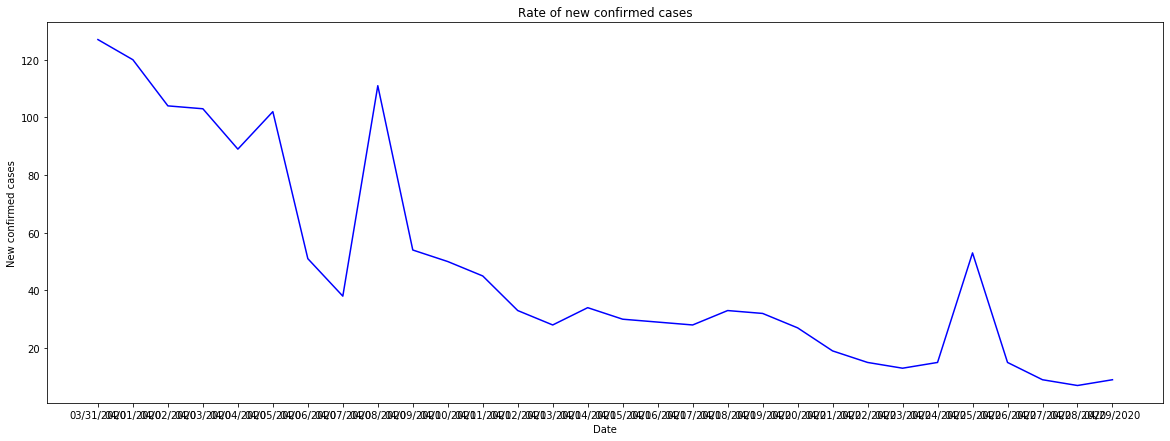

Update Date= 29/04/2020 11:34


In [15]:
#อัตราพบผู้ป่วยใหม่
fig, ax1 = plt.subplots(figsize=(20,7))
sns.lineplot(data=update_df[-30:], y="NewConfirmed", ax=ax1, x="Date", color="blue")

ax1.set_xlabel("Date")
ax1.set_ylabel("New confirmed cases")

plt.title("Rate of new confirmed cases")
plt.show()

print("Update Date=",date)

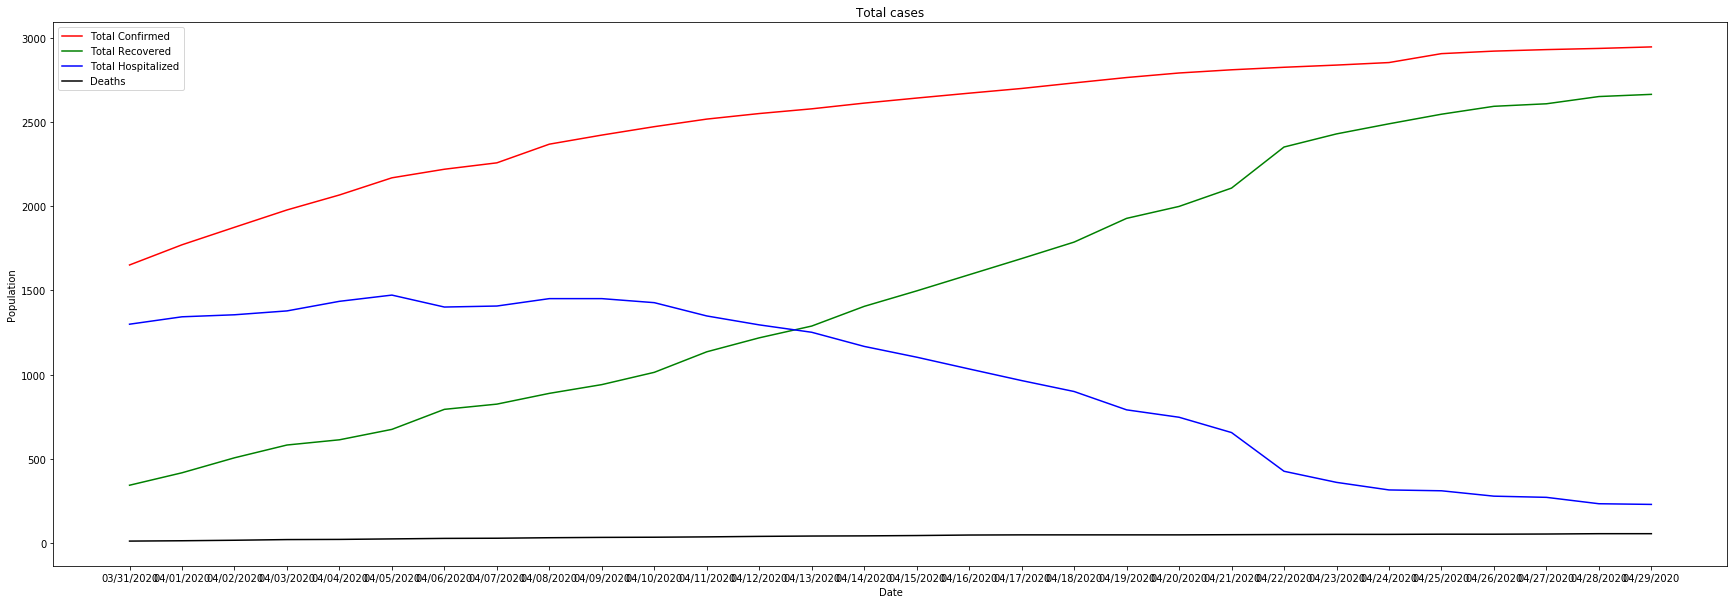

Update Date= 29/04/2020 11:34


In [16]:
#แสดงกราฟ overview
fig, ax1 = plt.subplots(figsize=(30,10))
sns.lineplot(data=update_df[-30:], y="Confirmed", ax=ax1, x="Date", label="Total Confirmed", color="red")
sns.lineplot(data=update_df[-30:], y="Recovered", ax=ax1, x="Date", label="Total Recovered", color="green")
sns.lineplot(data=update_df[-30:], y="Hospitalized", ax=ax1, x="Date", label="Total Hospitalized", color="blue")
sns.lineplot(data=update_df[-30:], y="Deaths", ax=ax1, x="Date", label="Deaths", color="black")

ax1.set_xlabel("Date")
ax1.set_ylabel("Population")

plt.title("Total cases")
plt.show()

print("Update Date=",date)